<a href="https://colab.research.google.com/github/vsobolev/vsobolev/blob/main/Chuki_Roko_may_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install missingno
!pip install missingno
!pip3 install python-dateutil
import numpy as np
import pandas as pd
import math
import datetime
import os
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
import missingno as msno


#import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')





### Loading data from CSV


In [29]:
#toy_columns = ['id', 'pcs', 'created', 'toy_id', 'user_id',  'coins_payed', 'is_gift']

#df_toys = pd.read_csv("toys.csv", columns =  toy_columns, index_col='id')
users = pd.read_csv("users.csv", delimiter='\t', index_col=0)
toys = pd.read_csv("toys.csv", delimiter='\t', index_col=0)

#with open('users.csv', 'r') as user:
#    header = f.readline().strip().split('\t')
#header.append('')


###  Formatting (created) to Y-M-D-H-M-S format

In [30]:
toys

#toys_date = toys
toys['created'] = toys['created'].str[:-13]
toys


toys.style.format({"created": lambda t: t.strftime("%Y/%m/%d %:h:%m:s")})
toys.head(5)


# Using DataFrame.style.format() and lambda function
#df.style.format({"InsertedDate": lambda t: t.strftime("%m/%d/%Y")})
#print(df)
# Convert datetime to string/object
#toys['ConvertedDate']=toys['created'].astype(str)
#toys.head(5)



,pcs,created,toy_id,user_id,coins_payed,is_gift
id,,,,,,
5942611,22900,2022-05-02 00:04:47,557,207371,0,False
5942579,22893,2022-05-02 00:00:08,557,161333,0,False
5942580,58791,2022-05-02 00:00:16,556,425707,0,False
5942581,46376,2022-05-02 00:00:22,343,332362,25,False
5942582,58792,2022-05-02 00:00:38,556,337092,0,False


### Distribution of toys on time

>default slice is 1000 pieces



In [ ]:
toys10 = toys[:10000]

plt.style.use('seaborn-colorblind')

plt.figure(figsize=(20,10))
sns.swarmplot('created', 'toy_id', data=toys10);
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


### Distribution of toys on time and users
default slice is 1000 pieces

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


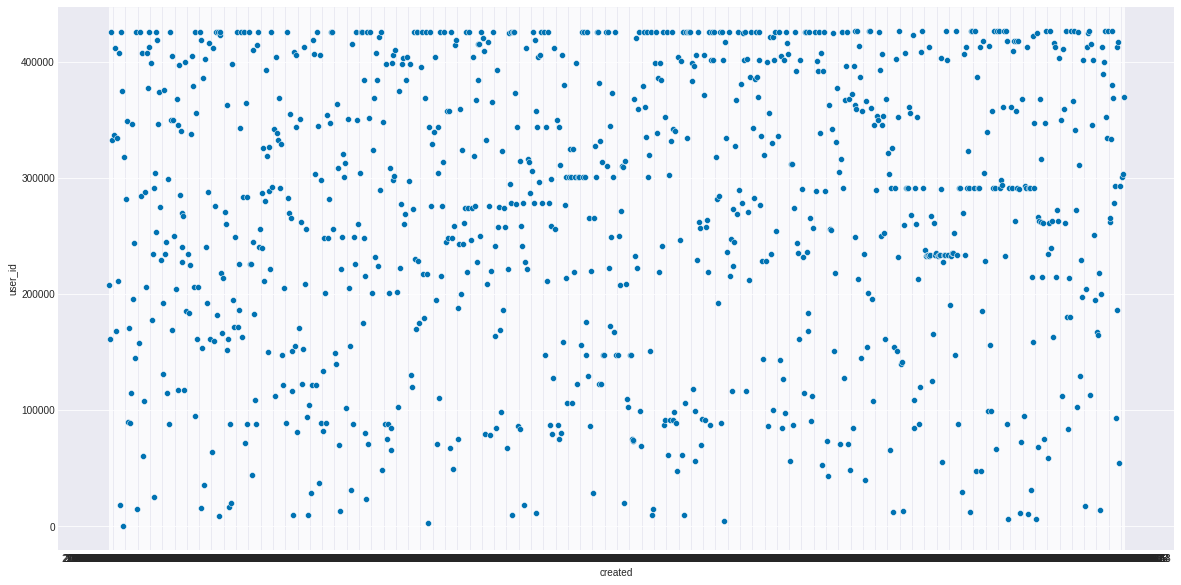

In [43]:
toys10 = toys[:1000]
plt.figure(figsize=(20,10))
sns.scatterplot(toys10['created'], toys10['user_id'])
plt.show()

#df['ConvertedDate']=df['DateTypeCol'].astype(str)
#print(df)

In [6]:
users.head(5)

,last_login,username,email,date_joined,country,coins_spent,bought_toys,total_toys,gifted_toys,bonus_coins
id,,,,,,,,,,
439995,2022-05-05 07:23:37.935731+00:00,username,email@qq.com,2022-05-05 04:28:23.070000+00:00,CN,50,2,9,0,45
451950,2022-05-10 06:50:13.455517+00:00,username,email@gmail.com,2022-05-06 17:27:02.408000+00:00,TH,25,1,6,0,20
448606,2022-05-06 08:01:51.080744+00:00,username,email@gmail.com,2022-05-06 08:01:01.001000+00:00,NG,75,3,8,0,105
449326,2022-05-08 14:39:32.881578+00:00,username,email@gmail.com,2022-05-06 09:46:56.794000+00:00,NaN,0,0,4,0,10
451661,2022-05-07 18:28:30.922070+00:00,username,email@gmail.com,2022-05-06 15:44:30.896000+00:00,KZ,0,0,5,0,10


##### Шпаргалка
###в users 
  емейлах оставлена доменная часть

у юзеров - ласт логин может быть 200 лет тому назад - сессии висят долго, datejoined - время регистрации

country они выбирают САМИ (мы не проставляем) поэтому инфа может быть не совсем честная, т.е. доверия к ней не много

### в toys
 id, уникальный ID игрушки (как сущности, как отдельной единицы) (порядковый номер, условно ключ)

pcs - номер игрушки из коллекции отдельной игрушки (условно - было 100 игрушек создано, и вот человек собрал 99ую игрушку, это и будет число pcs)

created - время сбора

coints payed - если человек купил игрушку за монетки, а не собрал

is_gift - подарили ли ему игрушку (также туда попадают игрушки собранные по ОДНОРАЗОВОМУ КОДУ)

### Types of valuents
### Unique values of datasets

In [ ]:

print ("Датасет игрушек, типы переменных :",toys.dtypes)
#print("Датасет игрушек, срез: ", toys.head())
print ("Датасет игрушек, инфо: ", toys.info)

print ("Датасет пользователи, типы переменных :",users.dtypes)
#print("Датасет пользователи, срез: ",users.head())
print ("Датасет пользователи, инфо: ", users.info)

print("Уникальные значения в DF toys: ")
print (toys.nunique())
print("Уникальные значения в DF users: ")
print (users.nunique())
#print("Уникальные значения toy_id в toys: ")
#toys.toy_id.unique()

In [8]:
def my_basic_research_toys(df="args", column = toys.columns [3:5]):
#def my_basic_research(df="args", column = toy_columns):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 10")
    print(df[column].value_counts().nlargest(10))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    #sns.distplot(df[column])
    #plt.title("Распределение прибыли по пользователям")

def my_basic_research_users(df="args", column = users.columns [6::]):
#def my_basic_research(df="args", column = toy_columns):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(10))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    #sns.distplot(df[column])
    #plt.title("Распределение прибыли по пользователям")


In [9]:
my_basic_research_toys(toys)

Базовые метрики
             user_id    coins_payed
count  251736.000000  251736.000000
mean   269314.495324       0.948315
std    124568.090807       4.775841
min         1.000000       0.000000
25%    171634.000000       0.000000
50%    281483.000000       0.000000
75%    381179.250000       0.000000
max    446467.000000      25.000000
------------------------------------
Самые популярные значения метрики, топ 10
user_id  coins_payed
424347   25             33
424499   25             33
442452   25             32
441501   25             32
442174   25             30
429983   25             26
11090    25             23
434864   25             22
440419   25             21
430922   25             15
dtype: int64
------------------------------------
Эксцесс  [-0.97266545 21.40197926]
Ассиметрия  [-0.35601667  4.83755923]


In [10]:
my_basic_research_users(users)

Базовые метрики
         bought_toys     total_toys    gifted_toys    bonus_coins
count  143305.000000  143305.000000  143305.000000  143305.000000
mean        1.006329      33.051185       0.514288      17.812847
std         1.960752      35.572437       2.654142      98.783042
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       6.000000       0.000000      10.000000
50%         0.000000      22.000000       0.000000      10.000000
75%         1.000000      49.000000       0.000000      10.000000
max       150.000000     449.000000     121.000000   19715.000000
------------------------------------
Самые популярные значения метрики, топ 5
bought_toys  total_toys  gifted_toys  bonus_coins
0            0           0            10             7081
             1           0            10             6653
             2           0            10             6113
             4           0            10             3856
             5           0    

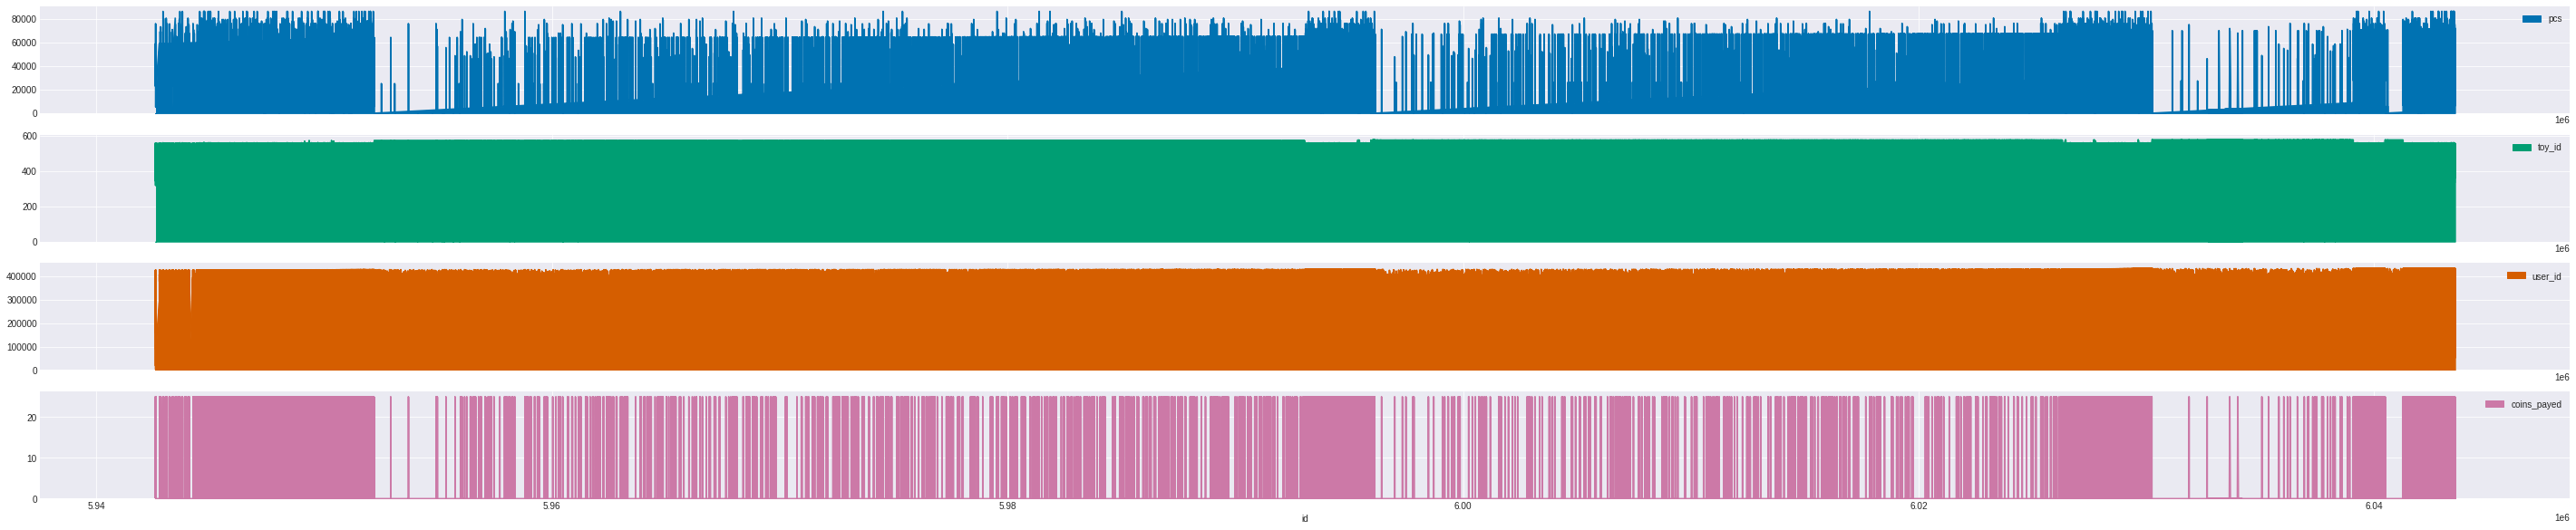

In [11]:
toys_2 = toys [0:100000]
axs = toys_2.plot.area(figsize=(50, 10), subplots=True)

In [12]:
print ('Пользователи')
print ( "Средняя coins_spent for users = ",  users["coins_spent"].mean())
print( "Средняя bought_toys for users = ",  users["bought_toys"].mean())
print ( "Средняя total_toys for users = ",  users["total_toys"].mean())
print ( "Средняя gifted_toys for users = ",  users["gifted_toys"].mean())
print ( " Средняя bonus_coins for users = ",  users["bonus_coins"].mean())
print ('Игрушки')
print ( "Средняя toy_id for toys = ",  toys["toy_id"].mean())
print( "Средняя coins_payed for toys = ",  toys["coins_payed"].mean())

Пользователи
Средняя coins_spent for users =  20.543351592756707
Средняя bought_toys for users =  1.0063291580893898
Средняя total_toys for users =  33.05118453647814
Средняя gifted_toys for users =  0.5142877080353093
 Средняя bonus_coins for users =  17.81284672551551
Игрушки
Средняя toy_id for toys =  562.4236541456129
Средняя coins_payed for toys =  0.9483149013251978


In [13]:
print ('Пользователи')
print ( "Медиана coins_spent for users = ",  users["coins_spent"].median())
print( "Медиана bought_toys for users = ",  users["bought_toys"].median())
print ( "Медиана total_toys for users = ",  users["total_toys"].median())
print ( "Медиана gifted_toys for users = ",  users["gifted_toys"].median())
print ( " Медиана bonus_coins for users = ",  users["bonus_coins"].median())
print ('Игрушки')
print ( "Медиана toy_id for toys = ",  toys["toy_id"].median())
print( "Медиана coins_payed for toys = ",  toys["coins_payed"].median())


Пользователи
Медиана coins_spent for users =  0.0
Медиана bought_toys for users =  0.0
Медиана total_toys for users =  22.0
Медиана gifted_toys for users =  0.0
 Медиана bonus_coins for users =  10.0
Игрушки
Медиана toy_id for toys =  563.0
Медиана coins_payed for toys =  0.0


In [ ]:
#toys.id.means()
plt.figure(figsize=(20,10))
sns.distplot(toys["pcs", "user_id"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


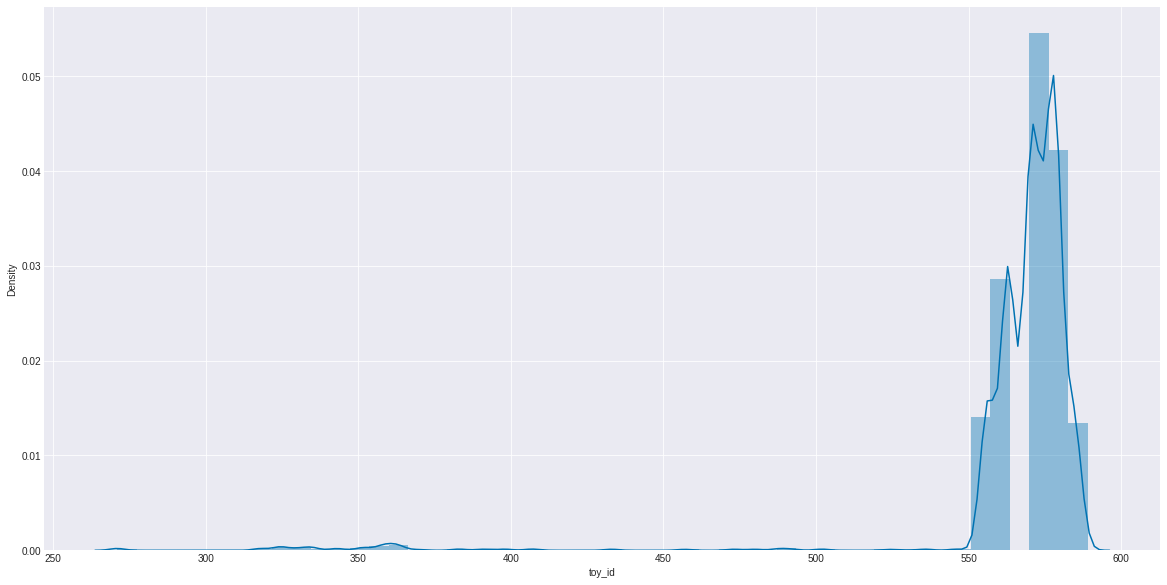

In [40]:
plt.figure(figsize=(20,10))
sns.distplot(toys["toy_id"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


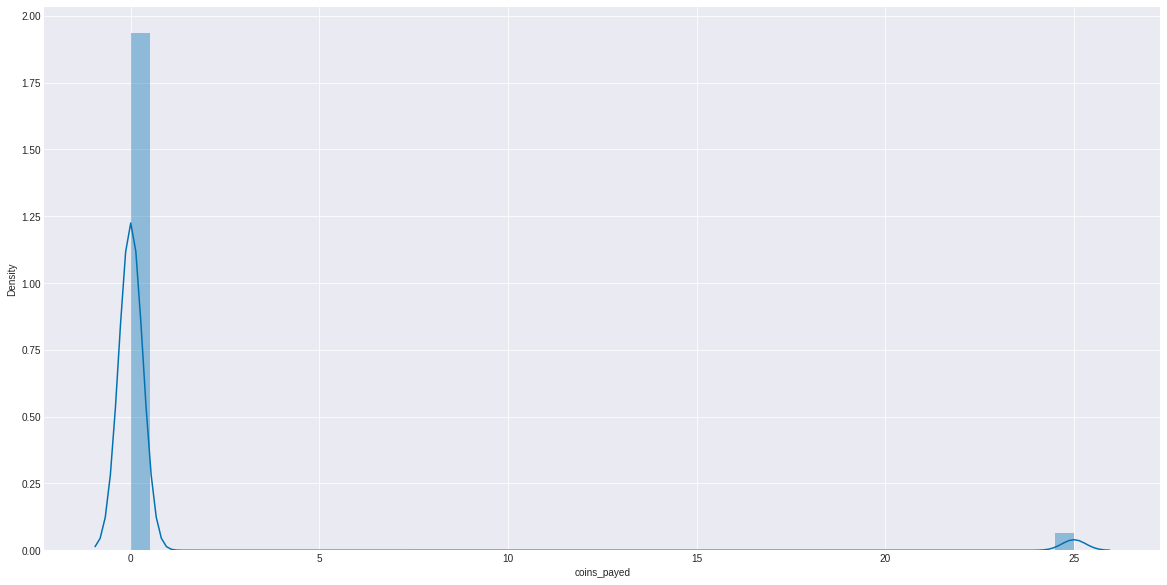

In [41]:
plt.figure(figsize=(20,10))
sns.distplot(toys["coins_payed"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


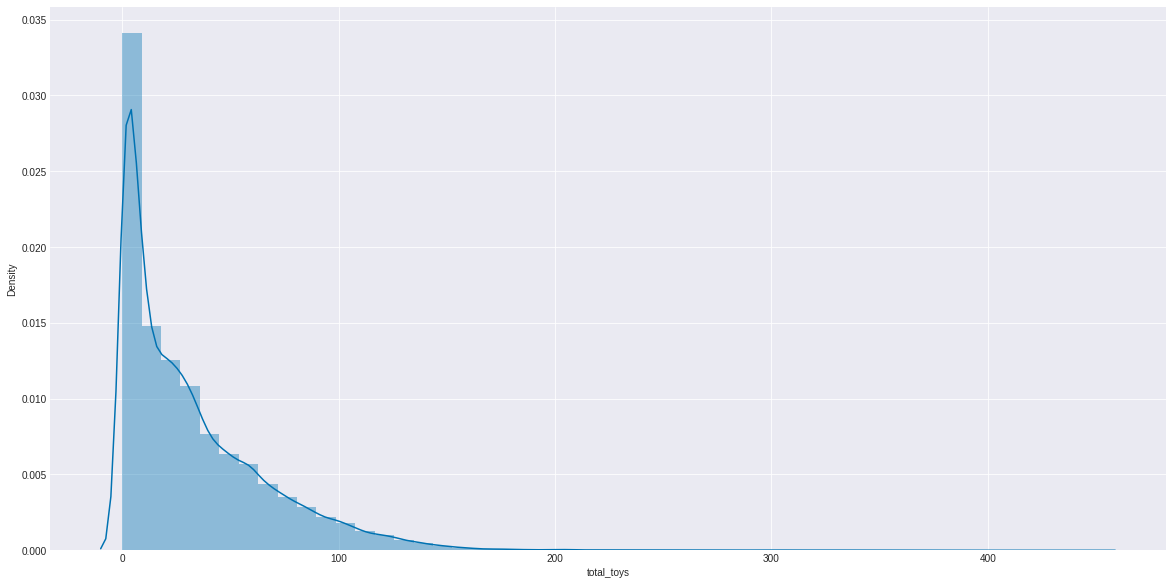

In [42]:
plt.figure(figsize=(20,10))
sns.distplot(users["total_toys"])

Index(['pcs', 'created', 'toy_id', 'user_id', 'coins_payed', 'is_gift'], dtype='object')


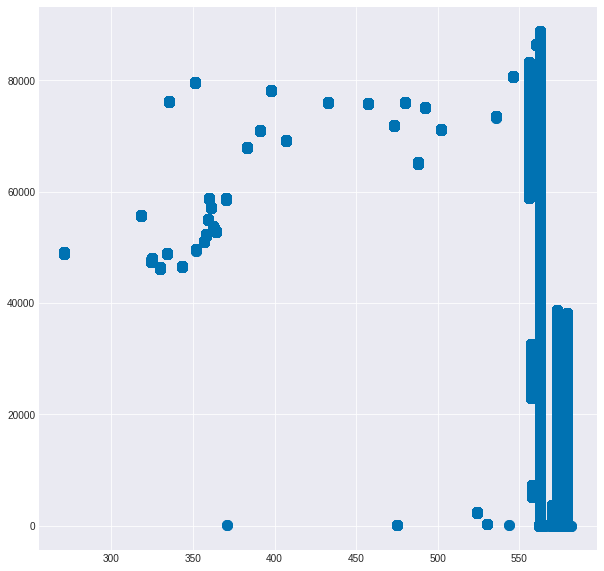

           pcs              created  toy_id  user_id  coins_payed  is_gift
id                                                                        
5942611  22900  2022-05-02 00:04:47     557   207371            0    False
5942579  22893  2022-05-02 00:00:08     557   161333            0    False
5942580  58791  2022-05-02 00:00:16     556   425707            0    False
5942581  46376  2022-05-02 00:00:22     343   332362           25    False
5942582  58792  2022-05-02 00:00:38     556   337092            0    False


In [18]:
 fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(toys["toy_id"], toys["pcs"], s=100)
print(toys.columns)
# отображаем картинку
plt.show()

print (toys.head())

In [19]:
#sns.color_palette('husl', 7)
print(pd.unique (toys["toy_id"]))
print ("Количество уникальных игрушек (dataset - toys): ", len(pd.unique (toys["toy_id"]) ))
print("Количество уникальных пользователей (dataset - toys) : " , len(pd.unique (toys["user_id"])))

[557 556 343 318 480 558 363 358 325 360 271 407 362 324 370 536 359 364
 560 383 546 330 334 433 488 473 457 391 357 361 352 492 335 351 502 524
 398 475 530 569 573 371 575 577 576 570 571 544 563 565 562 579 582 578]
Количество уникальных игрушек (dataset - toys):  54
Количество уникальных пользователей (dataset - toys) :  113841


In [20]:
users

,last_login,username,email,date_joined,country,coins_spent,bought_toys,total_toys,gifted_toys,bonus_coins
id,,,,,,,,,,
439995,2022-05-05 07:23:37.935731+00:00,username,email@qq.com,2022-05-05 04:28:23.070000+00:00,CN,50,2,9,0,45
451950,2022-05-10 06:50:13.455517+00:00,username,email@gmail.com,2022-05-06 17:27:02.408000+00:00,TH,25,1,6,0,20
448606,2022-05-06 08:01:51.080744+00:00,username,email@gmail.com,2022-05-06 08:01:01.001000+00:00,NG,75,3,8,0,105
449326,2022-05-08 14:39:32.881578+00:00,username,email@gmail.com,2022-05-06 09:46:56.794000+00:00,NaN,0,0,4,0,10
451661,2022-05-07 18:28:30.922070+00:00,username,email@gmail.com,2022-05-06 15:44:30.896000+00:00,KZ,0,0,5,0,10
...,...,...,...,...,...,...,...,...,...,...
426771,2022-05-02 09:55:38.275978+00:00,username,email@gmail.com,2022-04-24 08:22:42.637000+00:00,NL,0,0,7,0,10
426908,2022-05-02 11:14:36.032416+00:00,username,email@gmail.com,2022-04-25 01:29:54.622000+00:00,MV,0,0,6,0,10
430966,2022-05-03 10:54:00.464049+00:00,username,email@gmail.com,2022-04-03 08:00:47.339000+00:00,NaN,0,0,2,0,10


In [21]:
country_users = pd.unique(users["country"])
country_users

array(['CN', 'TH', 'NG', nan, 'KZ', 'BR', 'UZ', 'UA', 'ID', 'IT', 'VN',
       'CA', 'SG', 'KR', 'US', 'TR', 'PK', 'JP', 'AS', 'IR', 'LT', 'PH',
       'AZ', 'BF', 'IN', 'TW', 'PT', 'AF', 'RU', 'NP', 'BY', 'AU', 'ZA',
       'GH', 'MY', 'BJ', 'BI', 'MO', 'LA', 'MX', 'AL', 'CZ', 'RW', 'GE',
       'HK', 'SE', 'MM', 'CI', 'MR', 'SN', 'GR', 'CM', 'AT', 'PE', 'KE',
       'DZ', 'AE', 'CH', 'LI', 'HU', 'WS', 'LR', 'SY', 'IL', 'MD', 'AM',
       'LC', 'KI', 'FR', 'AR', 'VC', 'BD', 'LV', 'AG', 'DO', 'BQ', 'AX',
       'AW', 'VG', 'EH', 'TG', 'CX', 'IE', 'DE', 'UY', 'ET', 'IM', 'ZM',
       'GB', 'MA', 'MW', 'NO', 'KP', 'LU', 'TN', 'YE', 'MT', 'MQ', 'NU',
       'HN', 'PR', 'SK', 'SI', 'GP', 'UM', 'EG', 'IQ', 'KG', 'GU', 'ZW',
       'SA', 'BB', 'AD', 'AO', 'LK', 'VE', 'LS', 'EC', 'CG', 'AQ', 'LB',
       'GM', 'ES', 'PL', 'FI', 'MC', 'CL', 'CY', 'MZ', 'KH', 'BN', 'CF',
       'TD', 'KY', 'CO', 'DM', 'DJ', 'AI', 'BS', 'BE', 'CR', 'ER', 'NL',
       'UG', 'EE', 'BG', 'DK', 'JO', 'JM', 'CU', 'BW

In [22]:
round (toys.describe(),0)

,pcs,toy_id,user_id,coins_payed
count,251736.0,251736.0,251736.0,251736.0
mean,33184.0,562.0,269314.0,1.0
std,25490.0,35.0,124568.0,5.0
min,1.0,271.0,1.0,0.0
25%,11772.0,563.0,171634.0,0.0
50%,26632.0,563.0,281483.0,0.0
75%,54334.0,575.0,381179.0,0.0
max,88788.0,582.0,446467.0,25.0


In [23]:
round (users.describe(),0)

,coins_spent,bought_toys,total_toys,gifted_toys,bonus_coins
count,143305.0,143305.0,143305.0,143305.0,143305.0
mean,21.0,1.0,33.0,1.0,18.0
std,36.0,2.0,36.0,3.0,99.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,6.0,0.0,10.0
50%,0.0,0.0,22.0,0.0,10.0
75%,25.0,1.0,49.0,0.0,10.0
max,1545.0,150.0,449.0,121.0,19715.0


In [24]:
users['country'].value_counts()


CN    12827
ID     7662
RU     7420
BR     7306
NG     7136
      ...  
VC        1
SO        1
TC        1
TO        1
TV        1
Name: country, Length: 237, dtype: int64

In [25]:
#users['coins_spent'].value_counts()


In [26]:

toys_date = toys
toys_date ['created'] = toys_date['created'].str[:-13]
toys_date

,pcs,created,toy_id,user_id,coins_payed,is_gift
id,,,,,,
5942611,22900,2022-0,557,207371,0,False
5942579,22893,2022-0,557,161333,0,False
5942580,58791,2022-0,556,425707,0,False
5942581,46376,2022-0,343,332362,25,False
5942582,58792,2022-0,556,337092,0,False
...,...,...,...,...,...,...
6195289,3646,2022-0,570,144509,0,False
6195290,3647,2022-0,570,170633,0,False
6195291,3648,2022-0,570,102357,0,False
